In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-cognitive-performance-analysis/human_cognitive_performance.csv


In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data
data = pd.read_csv('/kaggle/input/human-cognitive-performance-analysis/human_cognitive_performance.csv')
data.sample(5)

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
64054,U64055,24,Male,7.7,9,Non-Vegetarian,3.7,High,247,347.99,96,86.91,91.79
64010,U64011,34,Female,6.9,4,Non-Vegetarian,9.9,High,250,522.44,76,46.88,46.10
20595,U20596,26,Female,8.0,2,Non-Vegetarian,3.3,Medium,452,351.02,56,72.51,68.90
18545,U18546,22,Female,8.0,9,Vegan,1.2,Low,284,418.58,90,60.76,63.81
18096,U18097,31,Male,5.4,1,Non-Vegetarian,5.5,Medium,259,242.30,52,85.99,82.34


# 🧩 Dataset Description

| Column Name            | Data Type   | Description                                               |
|------------------------|-------------|-----------------------------------------------------------|
| User_ID                | Categorical | Unique identifier for users                               |
| Age                    | Numerical   | Age of the user                                           |
| Gender                 | Categorical | Male / Female / Other                                     |
| Sleep_Duration         | Numerical   | Sleep hours per night                                     |
| Stress_Level           | Numerical   | Scale from 1 to 10                                        |
| Diet_Type              | Categorical | Vegetarian, Non-Vegetarian, Vegan                         |
| Daily_Screen_Time      | Numerical   | Hours spent on screens daily                              |
| Exercise_Frequency     | Categorical | Low, Medium, High                                        |
| Caffeine_Intake        | Numerical   | mg of caffeine consumed per day                           |
| Reaction_Time          | Numerical   | Time in milliseconds (ms)                                 |
| Memory_Test_Score      | Numerical   | Score out of 100                                          |
| Cognitive_Score        | Numerical   | AI-generated overall cognitive performance score           |
| AI_Predicted_Score     | Numerical   | ML model’s prediction of cognitive performance             |


In [4]:
# copy the data - good practise 
hcp_data = data.copy(deep=True)
hcp_data.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


In [5]:
# get info about the data 
hcp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [6]:
# convert Stress_Level to a category type 
hcp_data['Stress_Level'] = hcp_data['Stress_Level'].astype('object')
hcp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  object 
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(3), object(5)
memory usage: 7.9+ MB


- There are **no null** values in the dataset.
- All the variables/features in the dataset seem to have a desired data type. 

In [7]:
# let us now separate out the numerical and categorical columns 
numerical_col = hcp_data.select_dtypes(include=['number']).columns
cat_col = hcp_data.select_dtypes(include=['O']).columns[1:] # I don't want User_ID to be included as a categorical column 

# print them
col_numerical_cat_dict = {
    'Numerical Columns': numerical_col,
    'Categorical Columns':cat_col
}
col_numerical_cat_series = pd.Series(col_numerical_cat_dict)
col_numerical_cat_series

Numerical Columns      Index(['Age', 'Sleep_Duration', 'Daily_Screen_...
Categorical Columns    Index(['Gender', 'Stress_Level', 'Diet_Type', ...
dtype: object

## EDA - Estimates of Location

In [8]:
# let us find out the estimates of location for the numerical columns 
def Estimates_Of_Location(df):
    '''
    This function calculates the Estimates of Location for the numerical columns. 
        I/O : df - the dataframe 
        O/P : a pandas DataFrame with estimates of location for each numerical column in df 
    '''
    # take numerical columns from the dataframe 
    numerical_df = df.select_dtypes(include = ['number'])

    # calculate the mean for each numerical feature
    mean_arr = np.mean(numerical_df, axis = 0)

    # calculate the median for each numerical feature
    median_arr = np.median(numerical_df, axis = 0)

    # transform to a df
    result_df = pd.DataFrame (
        {
            'Mean':mean_arr,
            'Median':median_arr
        },
        index=numerical_df.columns
    )

    return result_df
    

In [9]:
# let us now call the function
Estimates_Of_Location(hcp_data)

,Mean,Median
Age,38.525525,39.00
Sleep_Duration,7.005333,7.00
Daily_Screen_Time,6.504646,6.50
Caffeine_Intake,248.988213,249.00
Reaction_Time,399.973579,400.36
Memory_Test_Score,69.498350,70.00
Cognitive_Score,58.172395,58.36
AI_Predicted_Score,58.121357,58.36


## EDA - Estimates of Variability 

### 1. **Standard Deviation (SD)**  
- **What:**  
  The average distance of each data point from the mean.  
- **Outliers:**  
  ✅ **Highly affected by outliers** — extreme values pull the mean and increase the SD.

### 2. **Mean Absolute Deviation (MAD from Mean)**  
- **What:**  
  The average of the absolute differences from the **mean**.
- **Outliers:**  
  ✅ **Affected by outliers**, but a bit less than SD because it doesn’t square the deviations.

### 3. **Median Absolute Deviation (MAD from Median)**  
- **What:**  
  The median of the absolute deviations from the **median**.
- **Outliers:**  
  ❌ **Robust to outliers.**  
  It uses the median, so extreme values don’t affect it much.

### 4. **Interquartile Range (IQR)**  
- **What:**  
  Difference between the 75th and 25th percentiles (Q3 - Q1). Measures the spread of the middle 50% of the data.
- **Outliers:**  
  ❌ **Robust to outliers.**  
  Only considers the range between Q1 and Q3, ignoring extreme values.


---

In [10]:
# function to estimate variability 
def Estimates_Of_Variability(df):
    '''
    This function calculates the Estimates of Variability for the numerical columns. 
        I/O : df - the dataframe 
        O/P : a pandas DataFrame with estimates of variability for each numerical column in df 
    '''
    # separate out the numerical dataset 
    numerical_df = df.select_dtypes(include=['number'])

    # Standard Deviation
    std_arr = np.std(numerical_df, axis = 0)

    # Mean Absolute Deviation
    mean_abs_dev_arr = np.mean(abs(numerical_df - np.mean(numerical_df, axis=0)), axis=0)

    # Median Absolute Deviation from median
    mad_arr = np.median(abs(numerical_df - np.median(numerical_df, axis=0)), axis=0)

    # percentiles 
    percentile_arr = np.percentile(numerical_df, q = [25,75] , axis=0)
    percentile_25 , percentile_75 = percentile_arr[0], percentile_arr[1]

    # Inter Quartile Range 
    iqr_arr = percentile_75 - percentile_25

    # transform to a df
    result_df = pd.DataFrame (
        {
            'Standard Deviation':std_arr,
            'Mean Absolute Deviation':mean_abs_dev_arr,
            'Median Absolute Deviation':mad_arr,
            '25th Percentile': percentile_25,
            '75th Percentile': percentile_75,
            'IQR': iqr_arr
        },
        index=numerical_df.columns
    )

    return result_df


In [11]:
# let us call the above function
Estimates_Of_Variability(hcp_data)

,Standard Deviation,Mean Absolute Deviation,Median Absolute Deviation,25th Percentile,75th Percentile,IQR
Age,12.101800,10.479142,10.00,28.00,49.00,21.00
Sleep_Duration,1.734424,1.500748,1.50,5.50,8.50,3.00
Daily_Screen_Time,3.167052,2.739500,2.70,3.80,9.20,5.40
Caffeine_Intake,144.541087,125.288610,126.00,123.00,375.00,252.00
Reaction_Time,115.368608,99.832561,99.56,300.15,499.25,199.10
Memory_Test_Score,17.305551,14.993538,15.00,55.00,85.00,30.00
Cognitive_Score,23.058378,19.173700,17.46,40.91,75.83,34.92
AI_Predicted_Score,23.119454,19.233863,17.52,40.85,75.89,35.04


## EDA - Esttimates of Skewness and Kurtosis 

### Skewness and Kurtosis: Understanding Their Role in Data Distribution

Both **skewness** and **kurtosis** are important statistical measures that describe the shape of a distribution. They help us understand how the data is distributed relative to the normal distribution (bell curve).

### 1. **Skewness**
**Skewness** measures the **asymmetry** of a distribution. It tells us if the data is **leaning to one side** (left or right) or if it's **symmetrical** around the mean.

- **Positive Skew (Right Skew)**: If the **right tail** of the distribution is longer than the left tail, it’s positively skewed. In this case, the mean is typically greater than the median because the extreme high values (outliers) pull the mean towards them.  
  Example: **Income Distribution** where a few very high earners skew the distribution.

- **Negative Skew (Left Skew)**: If the **left tail** is longer than the right tail, the distribution is negatively skewed. Here, the mean will be smaller than the median as extreme low values (outliers) pull the mean down.
  Example: **Age at Retirement**, where most people retire around a certain age, but a few retire early, skewing the distribution left.

- **Zero Skew (Symmetrical Distribution)**: A skewness value close to 0 indicates that the distribution is symmetric, and both sides of the distribution are mirror images. In a perfectly symmetrical distribution (like a normal distribution), skewness is 0.

#### Formula:
Skewness $ \gamma_1 $ is calculated as:
$
\gamma_1 = \frac{n}{(n-1)(n-2)} \sum_{i=1}^n \left(\frac{x_i - \bar{x}}{s}\right)^3
$
Where:
- $ n $ is the number of data points.
- $ \bar{x} $ is the mean of the data.
- $ s $ is the standard deviation of the data.
- $ x_i $ is each data point.

#### Interpretation:
- **Skewness > 0**: Right skew (tail to the right).
- **Skewness < 0**: Left skew (tail to the left).
- **Skewness = 0**: Symmetrical distribution.

### 2. **Kurtosis**
**Kurtosis** measures the **tailedness** or the **sharpness** of a distribution. It indicates how much of the data is in the **tails** (extreme values) compared to the normal distribution.

- **Leptokurtic (Kurtosis > 0)**: If a distribution has a higher peak and heavier tails than a normal distribution, it’s leptokurtic. These distributions have more extreme outliers than the normal distribution.  
  Example: **Stock market returns** can sometimes exhibit leptokurtic behavior with sudden, extreme price changes.

- **Platykurtic (Kurtosis < 0)**: A platykurtic distribution has a lower peak and lighter tails than the normal distribution. These distributions are less prone to extreme outliers.  
  Example: **Exam scores** where most students score similarly, with few extreme values.

- **Mesokurtic (Kurtosis = 0)**: A mesokurtic distribution has a shape similar to the normal distribution, with moderate tails. It doesn't have extreme outliers or a sharp peak.
  Example: **Height distribution** in a population typically follows a mesokurtic pattern.

#### Formula:
Kurtosis $ \gamma_2 $ is calculated as:
$
\gamma_2 = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^n \left(\frac{x_i - \bar{x}}{s}\right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}
$
Where:
- $ n $ is the number of data points.
- $ \bar{x} $ is the mean of the data.
- $ s $ is the standard deviation of the data.
- $ x_i $ is each data point.

#### Interpretation:
- **Kurtosis > 0**: Leptokurtic distribution (heavy tails).
- **Kurtosis = 0**: Mesokurtic distribution (normal distribution).
- **Kurtosis < 0**: Platykurtic distribution (light tails).

---

### Example:

Let’s say we have two distributions, **A** and **B**:

- **Distribution A**: Positive skewness (right skew), meaning more data points are clustered on the lower end, but there are some extreme high values.
- **Distribution B**: Leptokurtic distribution, with extreme values (outliers) in the tails, but a sharp peak at the mean.

- **A** could have a **skewness value** of +1 (indicating right skew) and a **kurtosis** of +3 (indicating leptokurtic distribution).
- **B** could have a **skewness value** of 0 (symmetrical distribution) and a **kurtosis** of +2 (leptokurtic, with more outliers than normal).

### Why are these important?
- **Skewness** helps you understand if your data is symmetric or has extreme values pulling the distribution in one direction.
- **Kurtosis** helps identify the presence of extreme values or outliers in the tails, which could impact the analysis, predictions, and risk assessments.

By understanding **skewness** and **kurtosis**, you get a more complete picture of your data's distribution beyond just the basic metrics like mean and standard deviation. This is especially important when making decisions or applying models that are sensitive to outliers or asymmetry.

In [12]:
# skewness and kurtosis

def Estimates_Of_Skewness_Kurtosis(df):
    '''
    This function calculates the skewness for the numerical columns in a DataFrame.
    
    Input:
        df - pandas DataFrame with numerical columns
        
    Output:
        pandas Series with skewness values for each numerical column
    '''
    numerical_df = df.select_dtypes(include=['number'])
    skewness = numerical_df.skew()
    kurtosis = numerical_df.kurtosis()
    
    # transform to a df
    result_df = pd.DataFrame (
        {
            'Skewness':skewness,
            'Kurtosis':kurtosis
        },
        index=numerical_df.columns
    )

    return result_df

In [13]:
# Skewness and Kurtosis 
Estimates_Of_Skewness_Kurtosis(hcp_data)

,Skewness,Kurtosis
Age,-0.003622,-1.196727
Sleep_Duration,-0.001085,-1.196580
Daily_Screen_Time,-0.002413,-1.193318
Caffeine_Intake,0.000797,-1.205632
Reaction_Time,0.002032,-1.195230
Memory_Test_Score,0.003266,-1.202884
Cognitive_Score,-0.091111,-0.734282
AI_Predicted_Score,-0.104215,-0.741358


### Insights

| **Variable**             | **Location (Mean / Median)** | **Variability (SD / IQR / MAD)** | **Insight (Location & Variability)**                                         | **Skewness** | **Kurtosis** | **Insight (Skewness & Kurtosis)** |
|--------------------------|------------------------------|----------------------------------|---------------------------------------------------------------------------|--------------|--------------|-----------------------------------|
| **Age**                  | 38.53 / 39.00                | SD: 12.1 / IQR: 21.0 / MAD: 10.0  | Symmetric distribution, moderate spread, no significant outliers.          | -0.0036      | -1.1967      | Nearly symmetric, platykurtic (light tails) |
| **Sleep Duration**       | 7.00 / 7.00                  | SD: 1.73 / IQR: 3.0 / MAD: 1.5   | Symmetric, concentrated around 7 hours. Low variability.                    | -0.0011      | -1.1966      | Symmetric, platykurtic (low peak, light tails) |
| **Daily Screen Time**    | 6.50 / 6.50                  | SD: 3.17 / IQR: 5.4 / MAD: 2.7   | Symmetric, but moderate variability. Wide range of screen times across users. | -0.0024      | -1.1933      | Symmetric, platykurtic |
| **Caffeine Intake (mg)** | 248.99 / 249.00              | SD: 144.5 / IQR: 252.0 / MAD: 126 | High variability! Very wide spread, potential outliers with high caffeine intake. | +0.0008      | -1.2056      | Symmetric, platykurtic |
| **Reaction Time (ms)**   | 399.97 / 400.36              | SD: 115.37 / IQR: 199.1 / MAD: 99.8 | High variability, potential outliers. Mean and median are close, symmetric distribution. | +0.0020      | -1.1952      | Symmetric, light tails |
| **Memory Test Score**    | 69.49 / 70.00                | SD: 17.3 / IQR: 30.0 / MAD: 15.0 | Symmetric, moderate variability in test performance.                      | +0.0033      | -1.2029      | Symmetric, platykurtic |
| **Cognitive Score**      | 58.17 / 58.36                | SD: 23.05 / IQR: 34.9 / MAD: 19.2 | Symmetric, moderate spread.                                                | -0.0911      | -0.7343      | Slight left skew, moderately flat |
| **AI Predicted Score**   | 58.12 / 58.36                | SD: 23.11 / IQR: 35.0 / MAD: 19.2 | Very close to Cognitive Score. AI prediction follows observed pattern closely. | -0.1042      | -0.7414      | Left skew, slightly flatter distribution |

---

## EDA - Exploring Data Distribution (Graphically)

### Histogram with KDE Plot

#### 📊 **Histogram**  
- A histogram **counts** how many data points fall into each bin (interval).
- It creates **bars** that represent the frequency of observations in each range.
- **Discrete** — depends on bin size. If you change the bin size, the shape can look very different.
- Good for seeing:
  - Data spread
  - Number of values in intervals
  - Outliers (extreme bars)


#### 🧩 **KDE (Kernel Density Estimation)**  
- KDE **estimates the probability density function (PDF)** of the data.
- It draws a **smooth curve** over the distribution.
- Doesn’t depend on bins — it "smooths" the data.
- Good for:
  - Understanding the underlying shape
  - Detecting multiple peaks (bimodality)
  - Visualizing skewness better

> Imagine KDE as pouring sand on your histogram and watching it smooth into gentle hills.

---

#### 🆚 **Comparison Table**

| Feature                    | Histogram                     | KDE Curve                              |
|----------------------------|--------------------------------|----------------------------------------|
| Type                       | Bar plot (discrete bins)       | Smooth curve (continuous estimate)     |
| Bin size sensitivity       | High                           | None (uses bandwidth instead)          |
| Use case                   | Count of data in intervals     | Smooth estimate of data distribution   |
| Good for                   | Frequencies, detecting gaps    | Understanding shape, skewness, peaks   |
| Looks like                 | 📊 Bars                        | 🧩 Smooth curve                        |

---

### 🎨 **Visual Impression**
If you plot both together (like we just did with `sns.histplot(..., kde=True)`):
- The **histogram** is the raw data representation.
- The **KDE** curve smoothly flows over the histogram, showing the "trend" of the data.

---

### 🧠 **In simple words:**
- **Histogram** = "How many people sleep X hours?"
- **KDE** = "What’s the probability someone sleeps around X hours?"

---

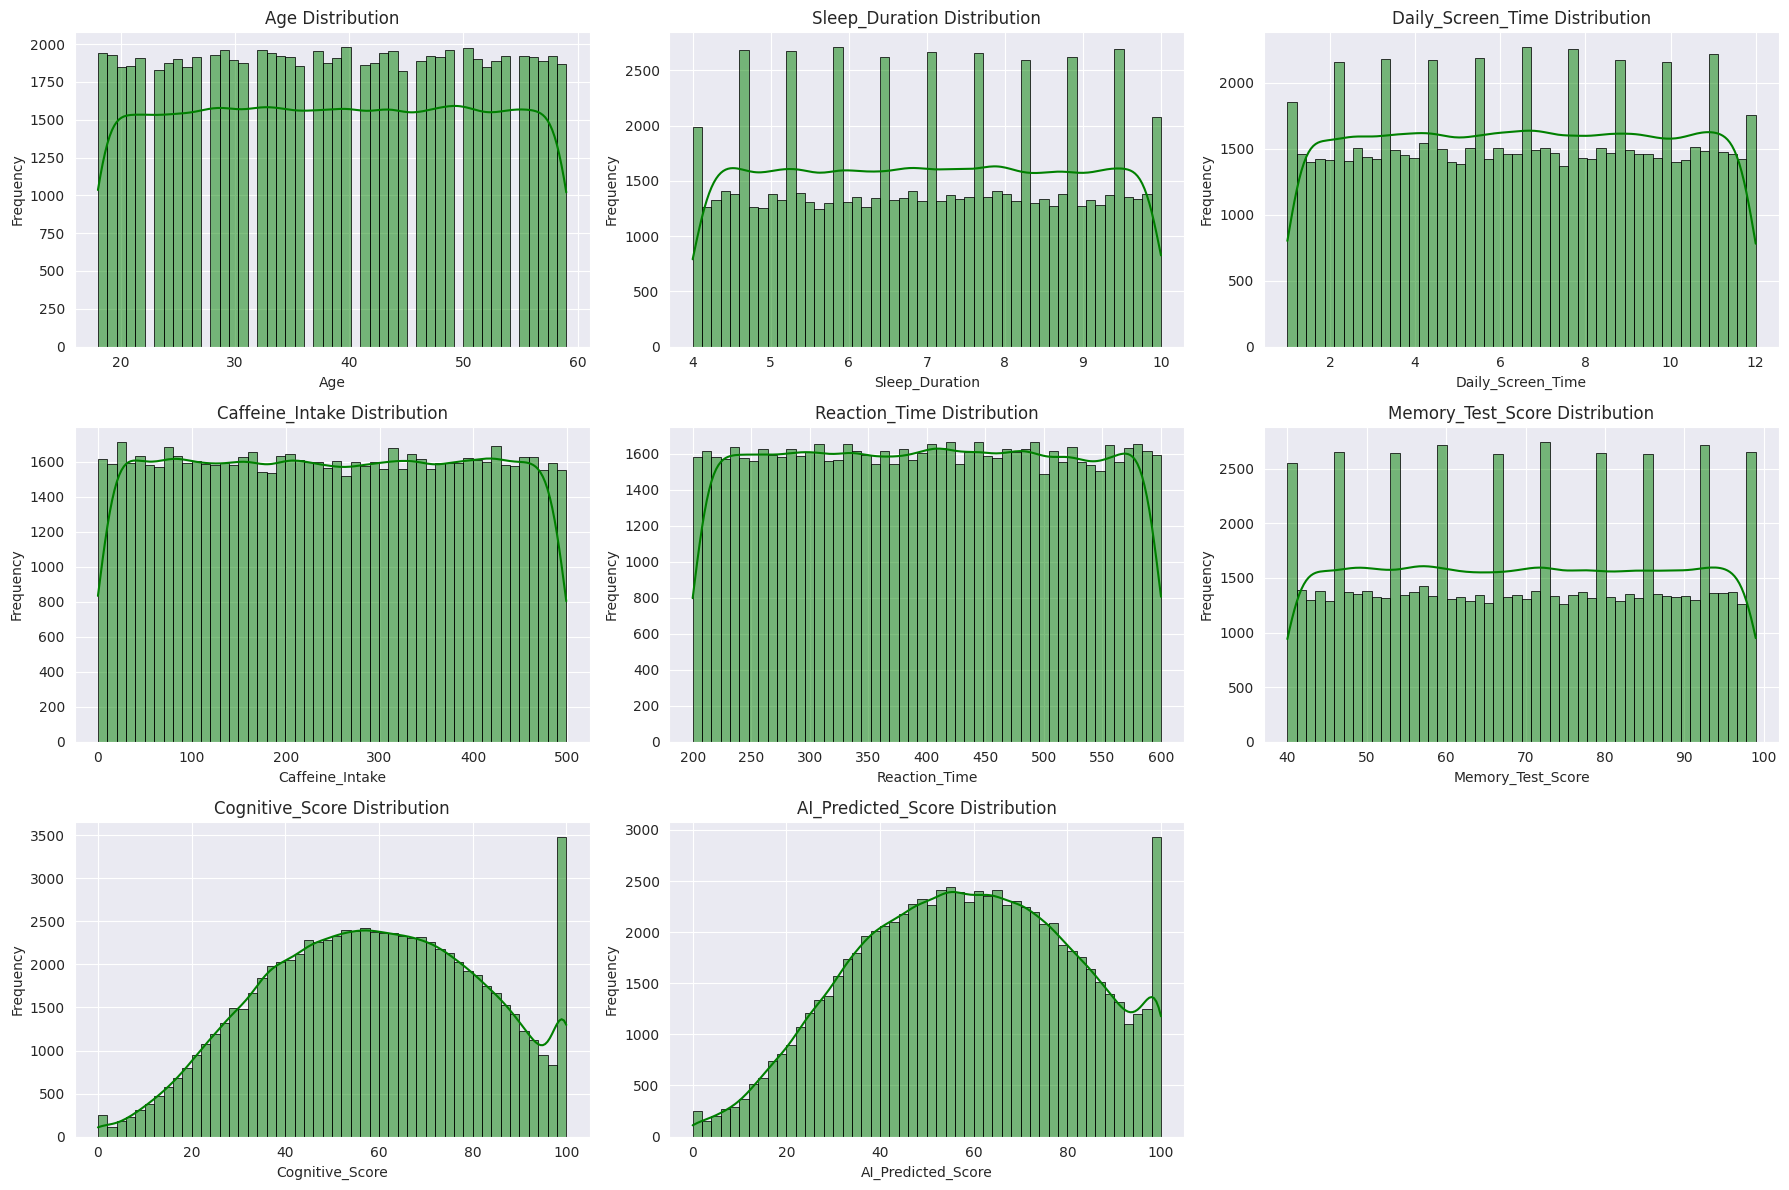

In [14]:
# histogram 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('darkgrid')

def plot_histograms_with_kde(df):
    '''
    plots the histogram with kde for each numerical variable.
    '''
    numerical_columns = df.select_dtypes(include='number').columns

    # Set figure size depending on number of variables
    n_cols = 3
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
    plt.figure(figsize=(n_cols * 6, n_rows * 4))

    for idx, col in enumerate(numerical_columns,1):
        # note , the idx starts from 1 
        plt.subplot(n_rows, n_cols, idx)
        sns.histplot(df[col], kde=True, bins=50, color='green', edgecolor='black')
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Call the function
plot_histograms_with_kde(hcp_data)

### 1. **Age Distribution**
- Fairly uniform, no skewness.
- Population spans ages 18 to ~60 evenly distributed.
- ✅ Good coverage of age groups.

### 2. **Sleep Duration Distribution**
- Interesting pattern: sharp peaks at whole numbers (5, 6, 7, 8 hours).  
- People tend to sleep full-hour durations (common in survey/self-reports).
- KDE shows slight peaks, overall consistent distribution.

### 3. **Daily Screen Time**
- Sharp peaks at whole numbers again.
- Usage distributed from ~1 to 12 hours.
- Common pattern in user-reported data — people round off to nearest hour.

### 4. **Caffeine Intake**
- Spreads from 0 to ~500 mg.
- Fairly uniform distribution.
- KDE smooth curve matches well with histogram.

### 5. **Reaction Time**
- Spread around 200 to ~600 ms.
- Uniform distribution (possibly synthetic or controlled data).
- KDE shows slight mode around middle values.

### 6. **Memory Test Score**
- Peaks at whole numbers, common in test scores.
- Uniform from ~40 to 100.
- KDE is relatively flat, no big surprises.

### 7. **Cognitive Score**
- Clear bell shape! Gaussian-like.
- Peaks around ~60.
- Indicates natural variability in cognitive scores.
- KDE complements histogram nicely.

### 8. **AI Predicted Score**
- Similar to cognitive score.
- Bell-shaped curve, peak around ~60–65.
- AI prediction appears to model human cognitive distribution well.

---

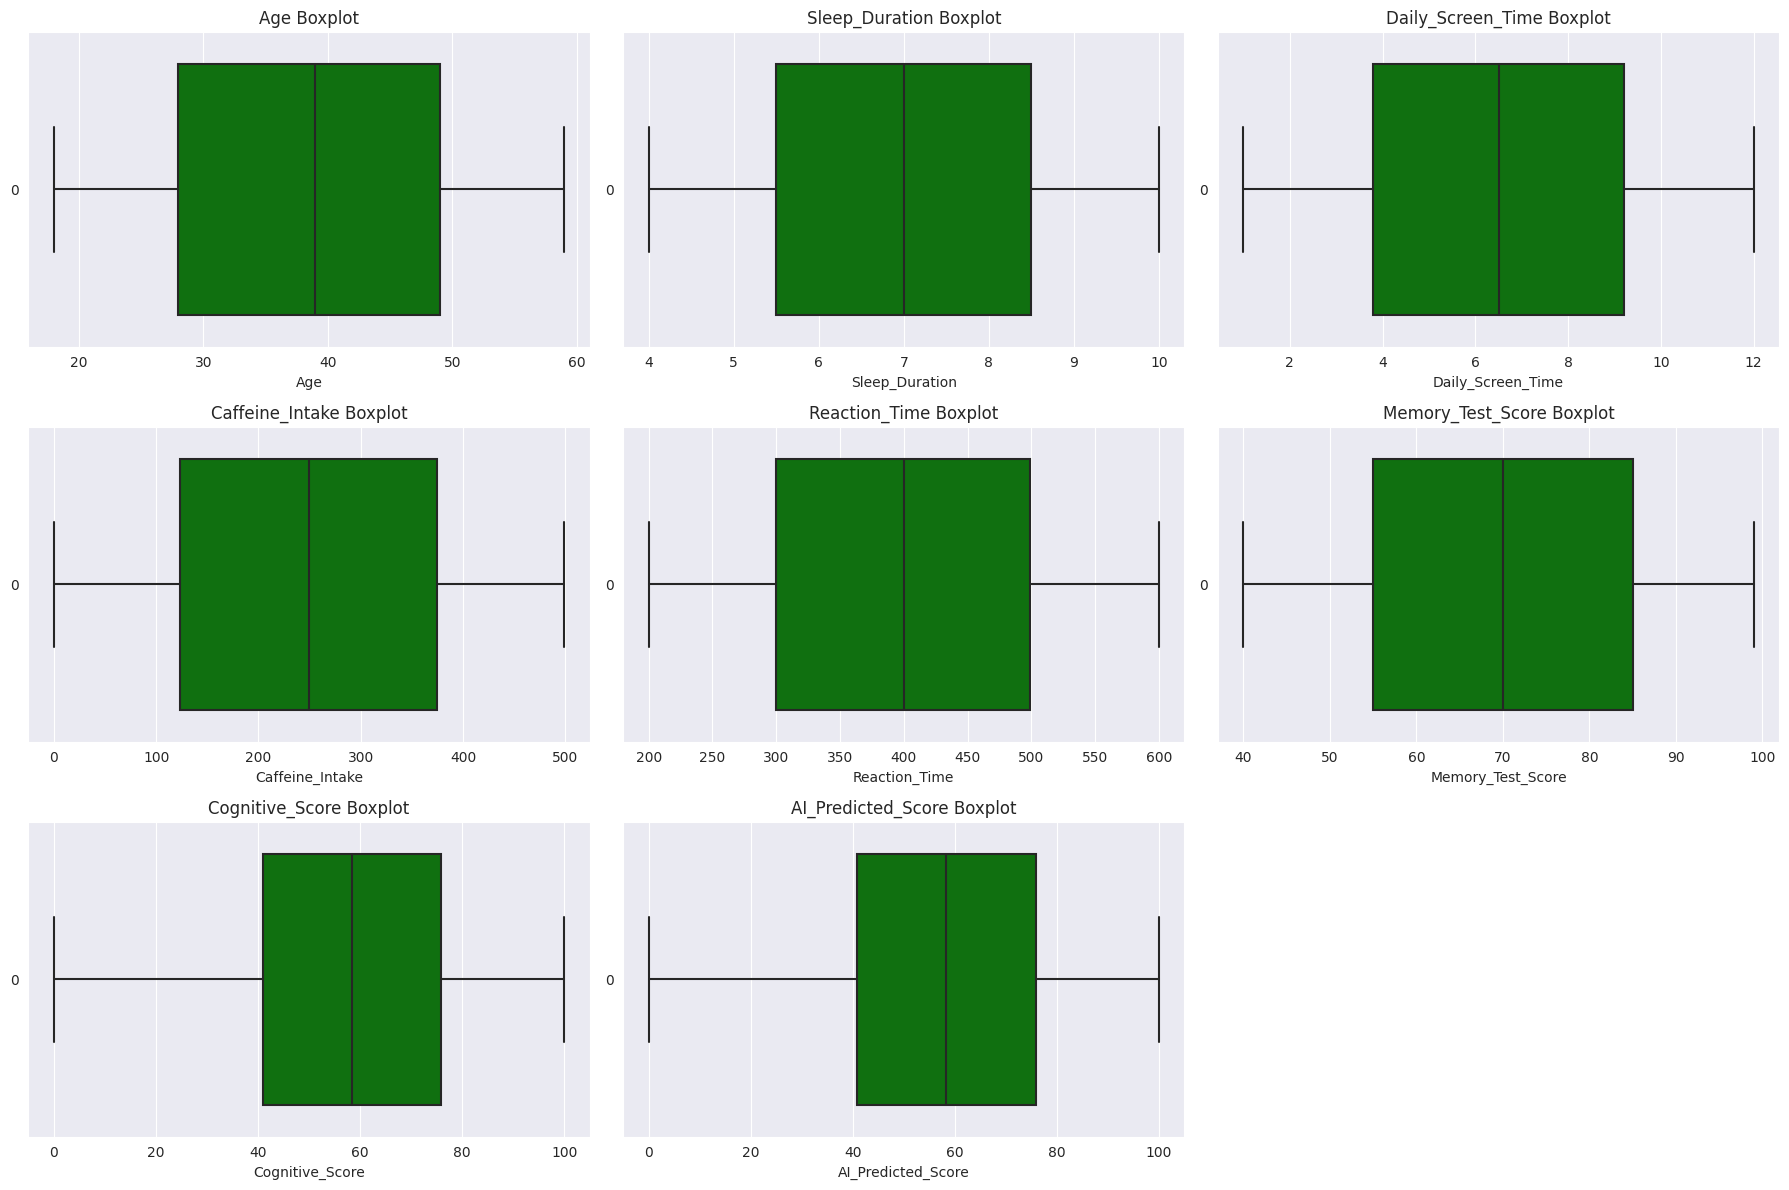

In [15]:
# Boxplots 

def plot_boxplots(df):
    '''
    plots the boxplots for each numerical variable.
    '''
    numerical_columns = df.select_dtypes(include='number').columns

    # Set figure size depending on number of variables
    n_cols = 3
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols
    plt.figure(figsize=(n_cols * 6, n_rows * 4))

    for idx, col in enumerate(numerical_columns,1):
        # note , the idx starts from 1 
        plt.subplot(n_rows, n_cols, idx)
        sns.boxplot(df[col], color='green', orient='h')
        plt.title(f'{col} Boxplot')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

# Call the function
plot_boxplots(hcp_data)

In [16]:
# Gt the Frequency table for each 
def Frequency_Table(df):
    numerical_columns = df.select_dtypes(include='number').columns
    for col in numerical_columns:
        binnedPopulation = pd.cut(df[col],10)
        print(binnedPopulation.value_counts(),'\n')

# call the function
Frequency_Table(hcp_data)

Age
(54.9, 59.0]      9511
(17.959, 22.1]    9481
(46.7, 50.8]      7769
(30.3, 34.4]      7700
(26.2, 30.3]      7696
(38.5, 42.6]      7619
(42.6, 46.7]      7611
(34.4, 38.5]      7600
(50.8, 54.9]      7561
(22.1, 26.2]      7452
Name: count, dtype: int64 

Sleep_Duration
(9.4, 10.0]     8848
(3.994, 4.6]    8722
(7.6, 8.2]      8131
(6.4, 7.0]      8046
(5.8, 6.4]      7979
(7.0, 7.6]      7977
(5.2, 5.8]      7926
(4.6, 5.2]      7909
(8.2, 8.8]      7899
(8.8, 9.4]      6563
Name: count, dtype: int64 

Daily_Screen_Time
(0.989, 2.1]    8221
(5.4, 6.5]      8131
(3.2, 4.3]      8069
(7.6, 8.7]      8064
(6.5, 7.6]      8056
(8.7, 9.8]      7987
(9.8, 10.9]     7987
(2.1, 3.2]      7975
(4.3, 5.4]      7913
(10.9, 12.0]    7597
Name: count, dtype: int64 

Caffeine_Intake
(-0.499, 49.9]    8131
(49.9, 99.8]      8054
(299.4, 349.3]    8054
(399.2, 449.1]    8048
(199.6, 249.5]    8008
(149.7, 199.6]    7983
(449.1, 499.0]    7948
(349.3, 399.2]    7946
(99.8, 149.7]     7939
(249.5

## EDA - Exploring Binary and Categorical Data



In [17]:
# we have already separated out the categorical columns
cat_col

Index(['Gender', 'Stress_Level', 'Diet_Type', 'Exercise_Frequency'], dtype='object')

In [18]:
# let us first view the number of ceategories for each categorical column
hcp_data[cat_col].nunique()

Gender                 3
Stress_Level          10
Diet_Type              3
Exercise_Frequency     3
dtype: int64

- All categories have `<=10` number of distinct categroies. Hence, we can write a program to view the categories separately.

In [19]:
# view the categories separately 
def get_unique_categories(df):
    '''
        This function returns the unique categories for each categorical variable
    '''
    cat_col = df.select_dtypes(include=['object','category']).columns[1:]
    unique_arr = [df[col].unique() for col in cat_col]
    
    unique_series = pd.Series(
        data = unique_arr,
        index = cat_col
    )
    return unique_series

# call 
get_unique_categories(hcp_data)

Gender                              [Female, Male, Other]
Stress_Level              [3, 9, 6, 2, 10, 1, 8, 5, 7, 4]
Diet_Type             [Non-Vegetarian, Vegetarian, Vegan]
Exercise_Frequency                    [Medium, High, Low]
dtype: object

- `Gender` is a Nominal variable
- `Stress_Level` is a Ordinal variable (since there is a sense of order)
- `Diet_Type` is a Nominal variable
- `Exercise_Frequency` is a Ordinal variable

In [20]:
# let's convert Stress_Level and Exercise_Frequency to ordinal variables 

# define the order
stress_level_order = np.arange(1,11)
ex_freq_order = ['Low','Medium','High']

# Convert to ordered categorical
hcp_data['Stress_Level'] = pd.Categorical(
    hcp_data['Stress_Level'],
    categories = stress_level_order,
    ordered = True
)

hcp_data['Exercise_Frequency'] = pd.Categorical(
    hcp_data['Exercise_Frequency'],
    categories = ex_freq_order,
    ordered = True
)

hcp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   User_ID             80000 non-null  object  
 1   Age                 80000 non-null  int64   
 2   Gender              80000 non-null  object  
 3   Sleep_Duration      80000 non-null  float64 
 4   Stress_Level        80000 non-null  category
 5   Diet_Type           80000 non-null  object  
 6   Daily_Screen_Time   80000 non-null  float64 
 7   Exercise_Frequency  80000 non-null  category
 8   Caffeine_Intake     80000 non-null  int64   
 9   Reaction_Time       80000 non-null  float64 
 10  Memory_Test_Score   80000 non-null  int64   
 11  Cognitive_Score     80000 non-null  float64 
 12  AI_Predicted_Score  80000 non-null  float64 
dtypes: category(2), float64(5), int64(3), object(3)
memory usage: 6.9+ MB


In [21]:
# value_counts and proportion 

def Univariate_Categorical_Analysis(df):
    cat_col = df.select_dtypes(include=['object','category']).columns[1:]

    # iterate 
    for col in cat_col:
        print(f'\n{col}\n')
        
        vc_df = pd.DataFrame(
            hcp_data[col].value_counts().reset_index().merge
        (hcp_data[col].value_counts(normalize=True).apply(lambda x: round(x*100,2)).reset_index())
        )
        
        print(vc_df.to_string(index=False),'\n')
        
        # Mode 
        print(f"The mode of Gender : {hcp_data[col].mode()[0]}")
        
        # Unique categories number 
        print(f"\nNumber of unique categories: {hcp_data[col].nunique()}")

        # Unique Categories
        print(f"\nUunique categories: {hcp_data[col].unique()}")
        
        # Rare categories (less than 1% occurrence)
        rare = vc_df[col][vc_df['proportion']<1].to_list()
        print(f"\nRare categories: {rare if rare else 'None'} \n")
        
        # show the count plot 
        plt.figure(figsize=(12,6))
        ax = sns.countplot(data=hcp_data, y=col, order = vc_df[col])
        # Add annotations to the end of each bar
        
        for p in ax.patches:
            # ax.patches gives you a list of all the bars (patches) in your plot.
            width = p.get_width() # since, we will get horizontal bars, the length of the bar is the width - how far the bar extends
            proportion = width/len(df)*100
            ax.text(width + 0.1,                 # x-position (end of bar + a little space)
                    p.get_y() + p.get_height()/2,  # y-position (center of the bar)
                    f'{int(width)}({proportion:.2f}%)',      # show percentage with 2 decimal places
                    ha='left', va='center', fontsize=11) # left and vertical alignment 
        
        plt.title(f'Distribution of {col}')
        plt.show()


Gender

Gender  count  proportion
Female  38404       48.00
  Male  38322       47.90
 Other   3274        4.09 

The mode of Gender : Female

Number of unique categories: 3

Uunique categories: ['Female' 'Male' 'Other']

Rare categories: None 



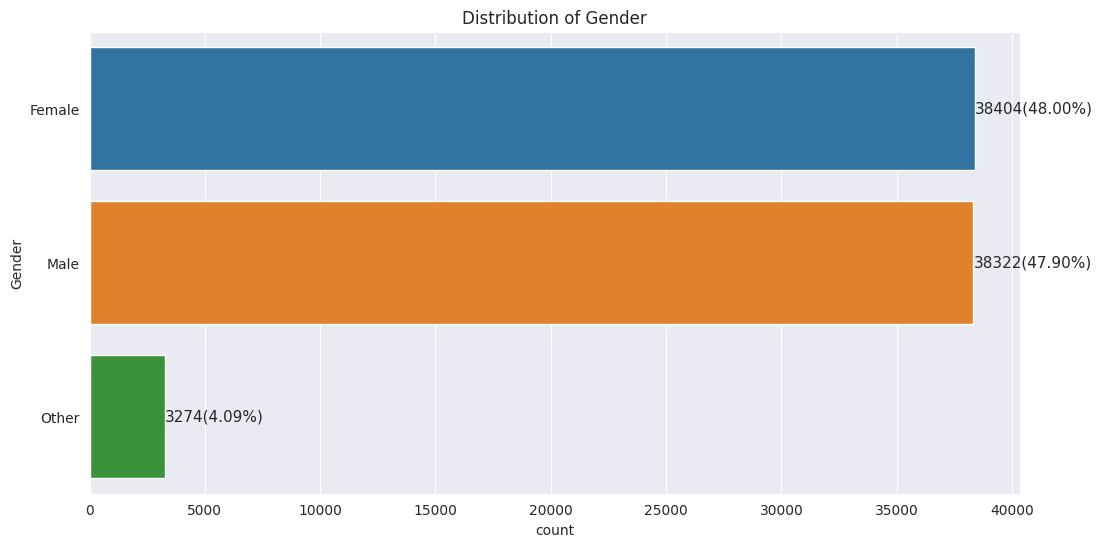


Stress_Level

Stress_Level  count  proportion
           3   8103       10.13
           8   8092       10.12
           5   8070       10.09
           7   8027       10.03
           6   8020       10.03
           4   8019       10.02
           1   7969        9.96
          10   7969        9.96
           2   7931        9.91
           9   7800        9.75 

The mode of Gender : 3

Number of unique categories: 10

Uunique categories: [3, 9, 6, 2, 10, 1, 8, 5, 7, 4]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

Rare categories: None 



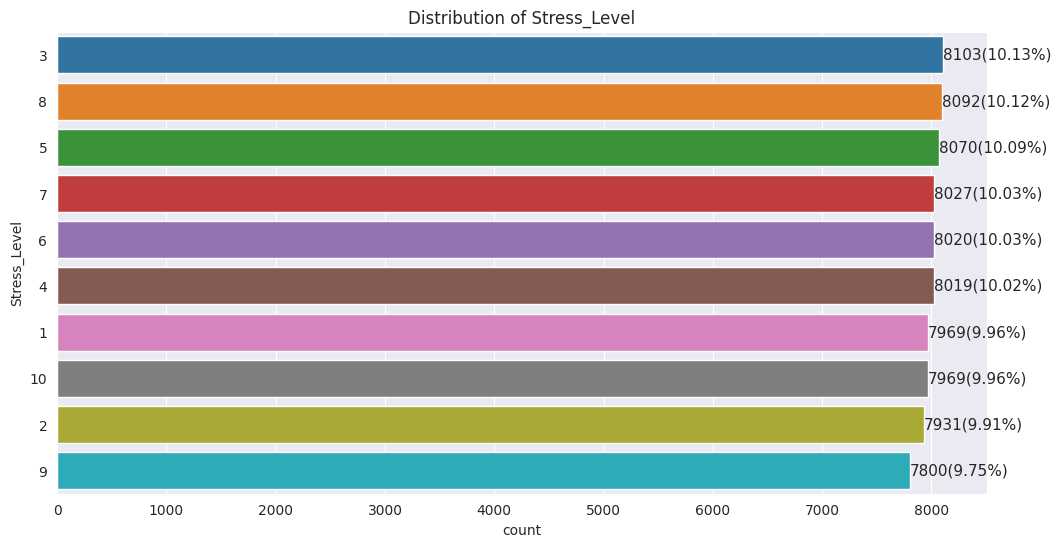


Diet_Type

     Diet_Type  count  proportion
Non-Vegetarian  47986       59.98
    Vegetarian  24136       30.17
         Vegan   7878        9.85 

The mode of Gender : Non-Vegetarian

Number of unique categories: 3

Uunique categories: ['Non-Vegetarian' 'Vegetarian' 'Vegan']

Rare categories: None 



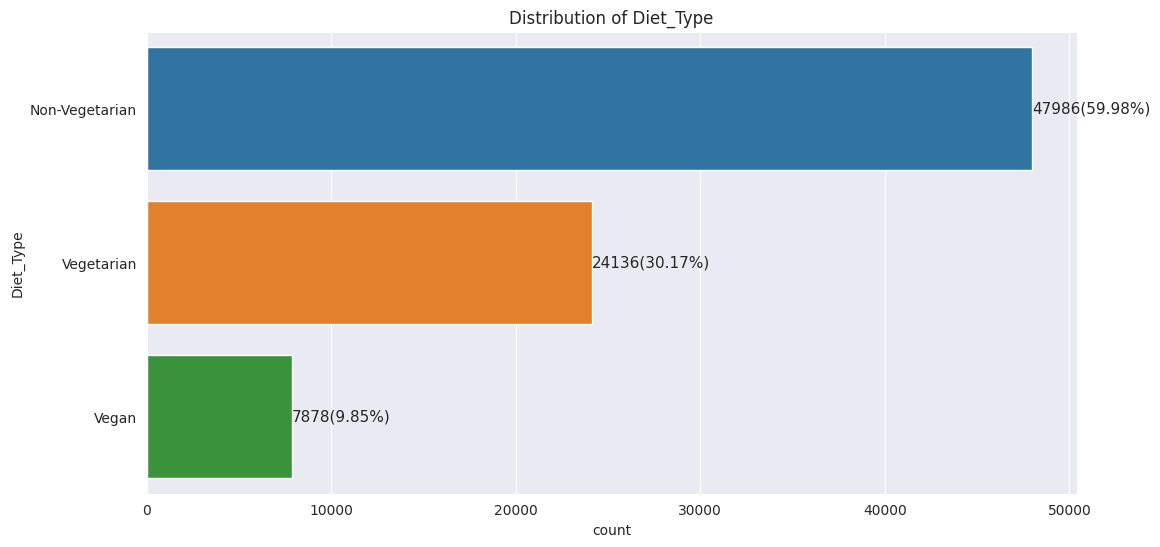


Exercise_Frequency

Exercise_Frequency  count  proportion
            Medium  31990       39.99
               Low  31896       39.87
              High  16114       20.14 

The mode of Gender : Medium

Number of unique categories: 3

Uunique categories: ['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High']

Rare categories: None 



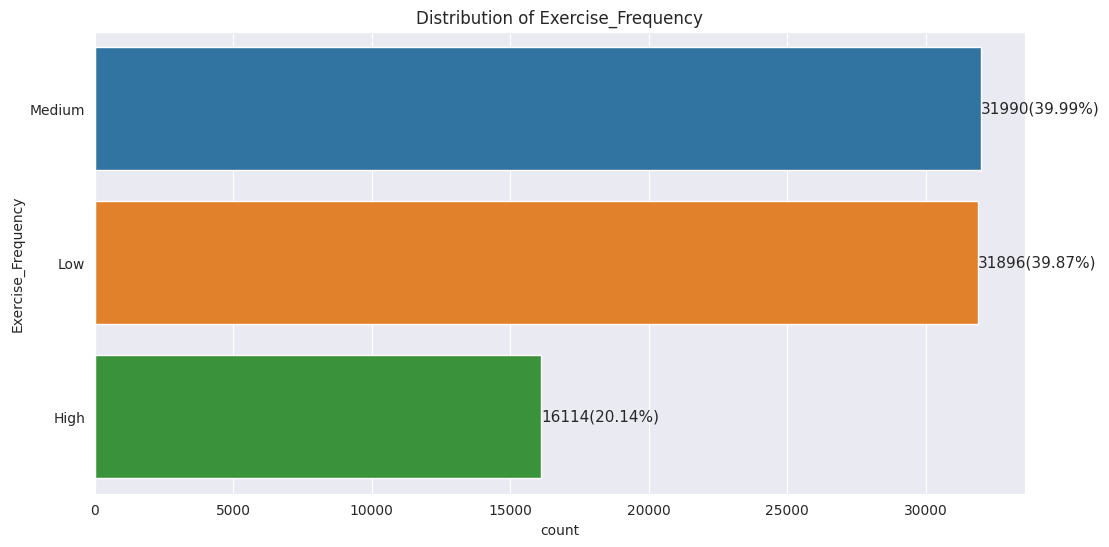

In [22]:
Univariate_Categorical_Analysis(hcp_data)

### **Insights:**

1. **Gender:**
   - The dataset is **almost evenly split** between Female (48%) and Male (47.9%).
   - A small but meaningful portion (4.1%) identifies as "Other", highlighting **inclusivity** in data collection.

2. **Stress_Level:**
   - The distribution is **evenly spread** across all 10 levels, with each stress level comprising around 10% of the data.
   - This suggests **no dominant stress level**, indicating either consistent survey design or a diverse population sample.

3. **Diet_Type:**
   - Majority of individuals (60%) are **Non-Vegetarian**.
   - A **significant portion** (40%) follow **plant-based diets** (Vegetarian/Vegan), which might reflect **lifestyle or cultural influences**.

4. **Exercise_Frequency:**
   - Most individuals fall under **Low (39.9%) or Medium (40%)** frequency.
   - Only **20% report High exercise**, hinting at a largely **sedentary or moderately active** population — potential public health concern.

---

## EDA -  Bivariate Analysis - Numerical vs Numerical
### Correlation Analysis and Heatmap

In [23]:
# let's plot the correlation matrix 
numeric_df = hcp_data.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix

,Age,Sleep_Duration,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
Age,1.000000,0.000691,-0.002442,-0.004267,0.004668,-0.002198,-0.005976,-0.006570
Sleep_Duration,0.000691,1.000000,-0.000376,-0.002482,-0.009699,-0.001525,0.150595,0.149472
Daily_Screen_Time,-0.002442,-0.000376,1.000000,-0.003295,0.000094,0.000315,-0.198515,-0.196098
Caffeine_Intake,-0.004267,-0.002482,-0.003295,1.000000,0.005546,0.002529,-0.122862,-0.120826
Reaction_Time,0.004668,-0.009699,0.000094,0.005546,1.000000,-0.002262,-0.818470,-0.812562
Memory_Test_Score,-0.002198,-0.001525,0.000315,0.002529,-0.002262,1.000000,0.363894,0.360398
Cognitive_Score,-0.005976,0.150595,-0.198515,-0.122862,-0.818470,0.363894,1.000000,0.992358
AI_Predicted_Score,-0.006570,0.149472,-0.196098,-0.120826,-0.812562,0.360398,0.992358,1.000000


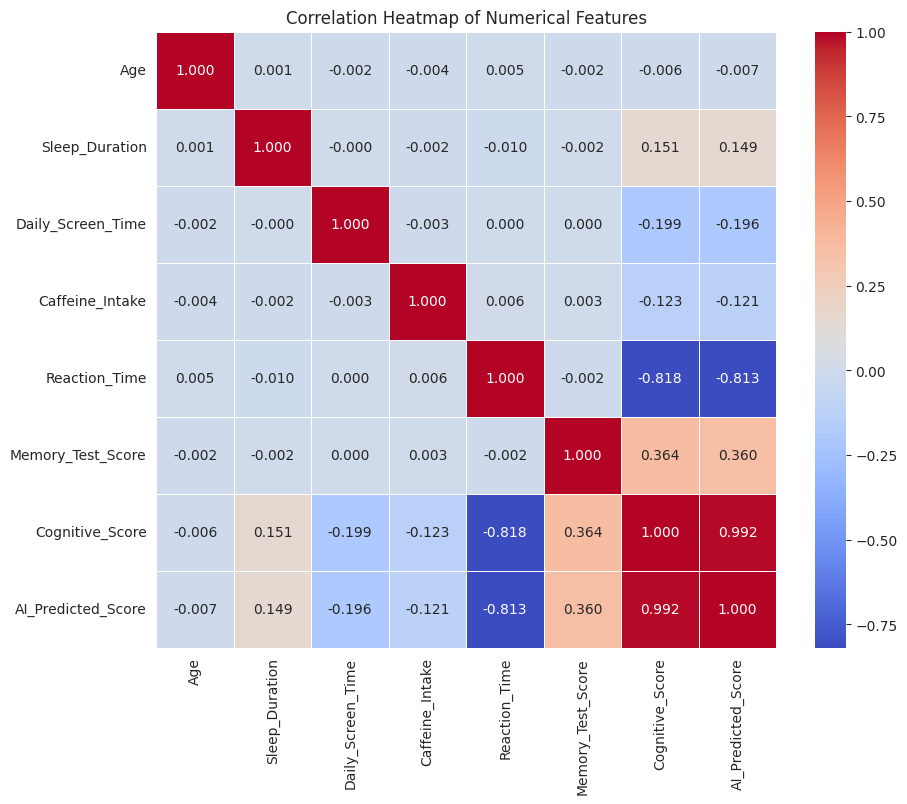

In [24]:
# let's plot the heatmap
# Set figure size
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Insights
---

### **Strong Correlations**
1. **Cognitive_Score & AI_Predicted_Score**  
   -  Correlation: **+0.99**  
   -  Extremely high positive correlation — the AI model closely replicates actual cognitive scores.

2. **Reaction_Time & Cognitive_Score**  
   -  Correlation: **-0.82**  
   -  Strong negative correlation — **higher reaction time (i.e., slower reactions)** is associated with **lower cognitive scores**.

3. **Reaction_Time & AI_Predicted_Score**  
   -  Correlation: **-0.81**  
   -  Similar negative trend — AI captures the negative impact of slower reaction time on cognitive performance.


### **Moderate Correlations**
4. **Memory_Test_Score & Cognitive_Score / AI_Predicted_Score**  
   -  Correlation: **+0.36**  
   -  Memory plays a moderate role in determining cognitive ability and is captured by the AI as well.

5. **Sleep_Duration & Cognitive_Score / AI_Predicted_Score**  
   -  Correlation: **+0.15**  
   -  Slight positive correlation — better sleep is mildly associated with better cognitive performance.


### **Weak/Negligible Correlations**
6.  **Age**, **Daily_Screen_Time**, and **Caffeine_Intake** show very low or **negligible correlation** with cognitive-related scores, indicating these variables may not be strong predictors in this dataset.

---

### Scatter Plot & Joint Plot - View the moderate and high correlated variables 

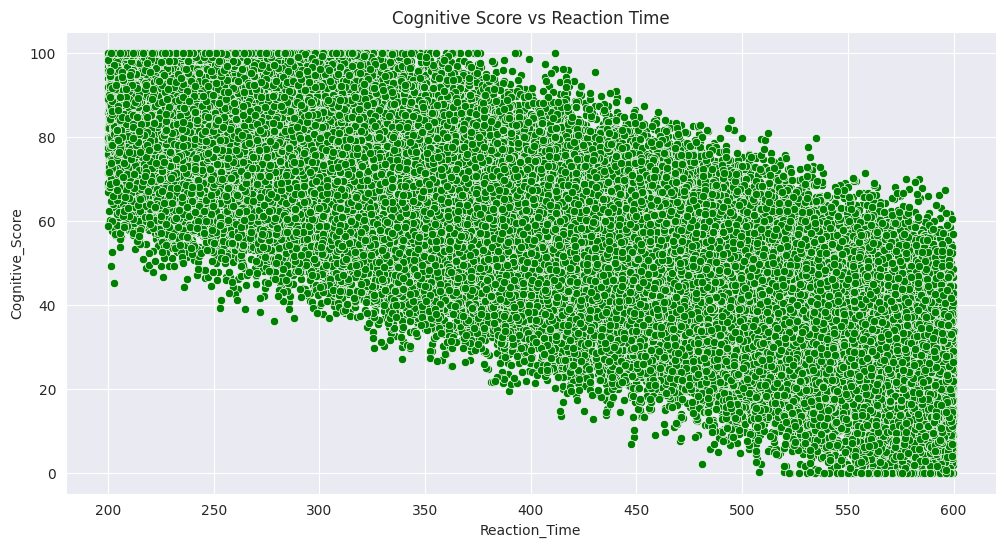

In [25]:
# Scatterplot - Cognitive_Score vs Reaction_Time
plt.figure(figsize=(12,6))
sns.scatterplot(data=hcp_data, x='Reaction_Time', y='Cognitive_Score', color='green')
plt.title('Cognitive Score vs Reaction Time')
plt.show()

- Expect a strong negative trend – as reaction time increases (slower), cognitive score decreases.

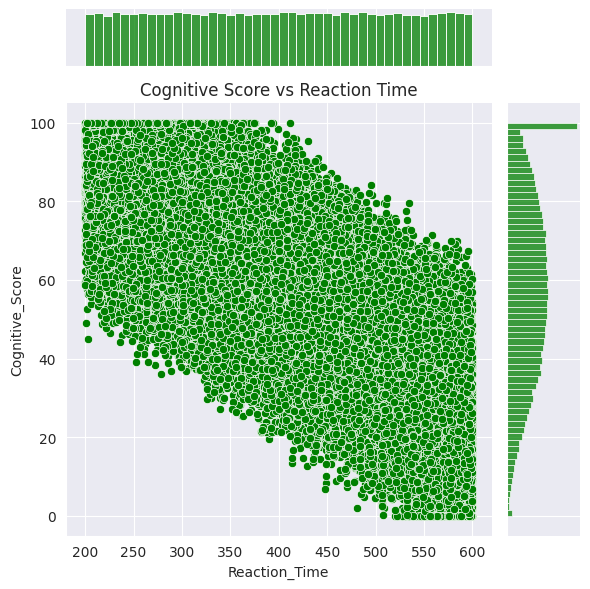

In [26]:
# Jointplot 
sns.jointplot(data=hcp_data, x='Reaction_Time', y='Cognitive_Score', color='green')
plt.title('Cognitive Score vs Reaction Time')
plt.tight_layout()
plt.show()

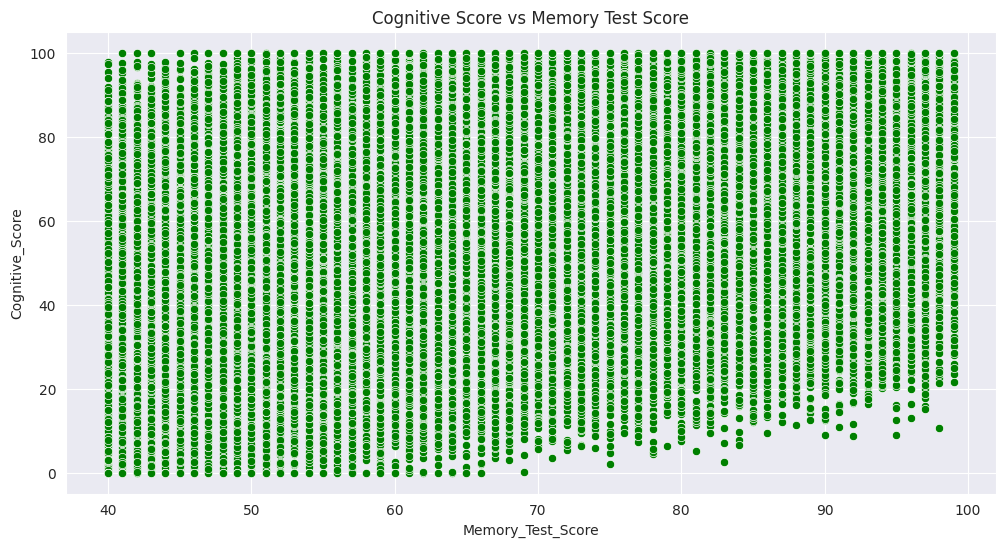

In [27]:
# Scatterplot - Cognitive_Score vs Memory_Test_Score
plt.figure(figsize=(12,6))
sns.scatterplot(data=hcp_data, x='Memory_Test_Score', y='Cognitive_Score', color='green')
plt.title('Cognitive Score vs Memory Test Score')
plt.show()

- Should show a moderate positive relationship – better memory test results relate to higher cognitive scores.



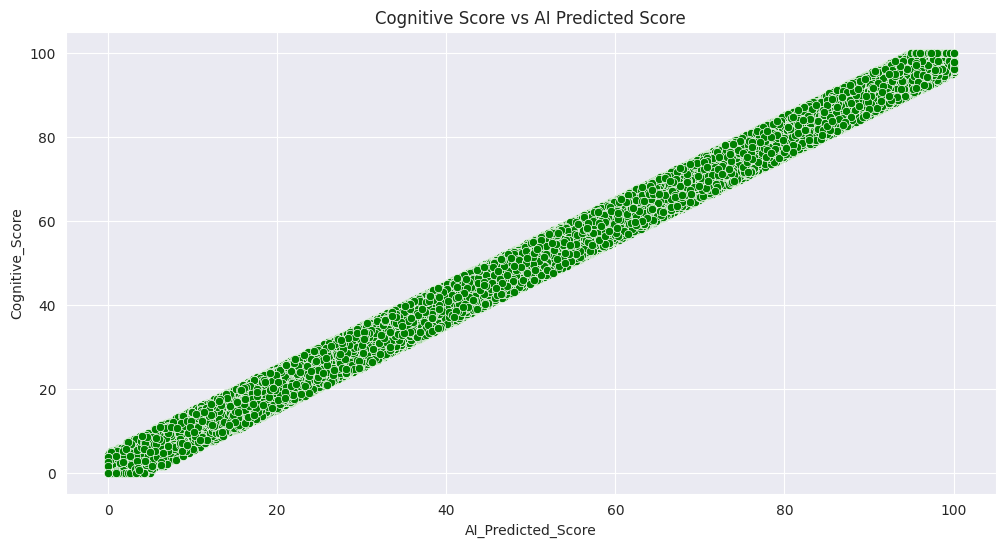

In [28]:
# Scatterplot - AI_Predicted_Score vs Cognitive_Score
plt.figure(figsize=(12,6))
sns.scatterplot(data=hcp_data, x='AI_Predicted_Score', y='Cognitive_Score', color='green')
plt.title('Cognitive Score vs AI Predicted Score')
plt.show()

- This should be almost linear (positive) — shows how closely the AI predictions align with true scores.

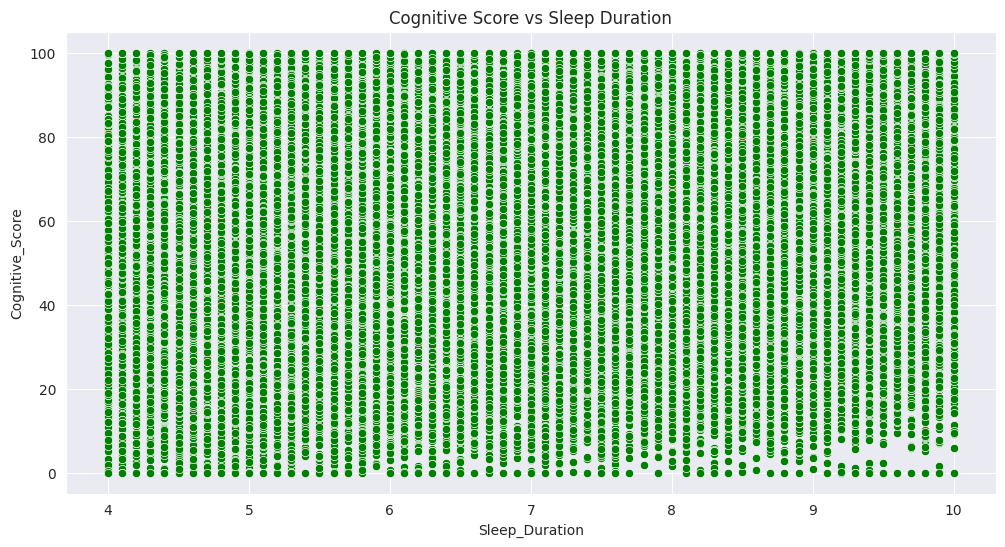

In [29]:
# Scatterplot -  Sleep_Duration vs Cognitive_Score
plt.figure(figsize=(12,6))
sns.scatterplot(data=hcp_data, x='Sleep_Duration', y='Cognitive_Score', color='green')
plt.title('Cognitive Score vs Sleep Duration')
plt.show()

- May reveal a slight positive relationship. However, presence of large number of data points has lead to overlapping points and the scatter plot has been cluttered.

### Hexbin Plot 

### 🧱 What is a Hexbin Plot?

A **hexbin plot** breaks the plot area into **hexagonal bins** and **counts how many data points fall into each bin**. The result is a honeycomb-like structure where:

- Each hexagon represents a bin.
- The **color intensity** of each hexagon represents the **number of points** in that bin (i.e., density).


### 🧠 Why use Hexbin Plots?

| Problem with Scatter Plot           | How Hexbin Helps                        |
|-------------------------------------|------------------------------------------|
| Overplotting (too many overlapping points) | Aggregates data into bins for clarity     |
| Hard to see point density            | Shows density via color                  |
| Outliers and clusters aren't visible | Patterns become much clearer             |


### 🧩 When to Use Hexbin Instead of Scatter?

Use `hexbin` when:
- You have **thousands of points**.
- You're exploring **correlation or clustering**.
- You want a **cleaner visual representation** of point density.

---

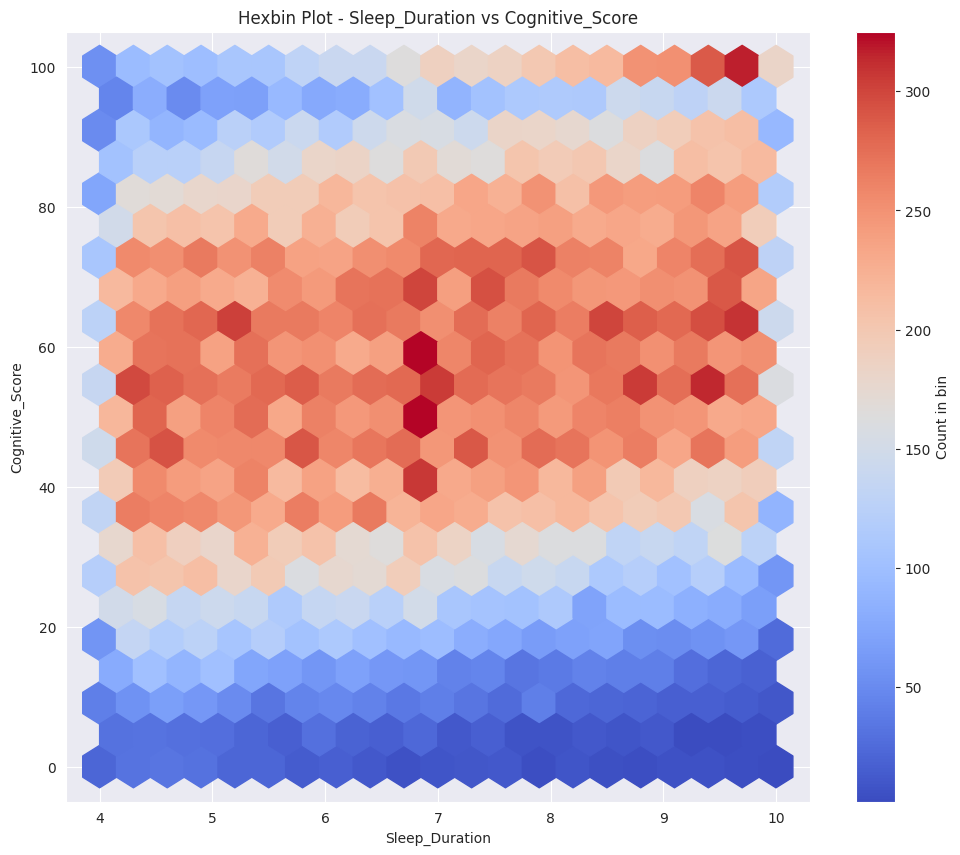

In [30]:
# Hexbin Plot - Sleep_Duration vs Cognitive Score 
plt.figure(figsize=(12,10))
plt.hexbin(x=hcp_data['Sleep_Duration'], y=hcp_data['Cognitive_Score'],gridsize=20, cmap='coolwarm') # gridsize: Number of hexagons across the x-axis.
plt.colorbar(label='Count in bin')
plt.title("Hexbin Plot - Sleep_Duration vs Cognitive_Score")
plt.xlabel("Sleep_Duration")
plt.ylabel("Cognitive_Score")
plt.show()

### **Hexbin Plot Analysis: Sleep_Duration vs. Cognitive_Score**

#### **1. Overall Pattern**
- **Positive Correlation**: Higher cognitive scores are concentrated in the **7–9 hours sleep range**, suggesting optimal cognitive performance is linked to sufficient (but not excessive) sleep.  
- **Lower Scores with Short/Long Sleep**:  
  - **<6 hours**: Sparse bins with lower cognitive scores (likely sleep deprivation effects).  
  - **>9 hours**: Fewer data points but trending toward moderately lower scores (possible oversleeping or underlying health issues).  

#### **2. Density Insights**
- **Peak Concentration**: The darkest hexagons (highest density) appear around **7–8 hours sleep** and **cognitive scores of 60–80**, aligning with typical healthy sleep guidelines.  
- **Outliers**:  
  - A few individuals with **4–5 hours sleep** achieve high scores (>80), but these are rare (may represent "short sleepers" with natural adaptability).  
  - Similarly, some with **9+ hours sleep** score poorly (<50), indicating potential confounding factors (e.g., depression, illness). 

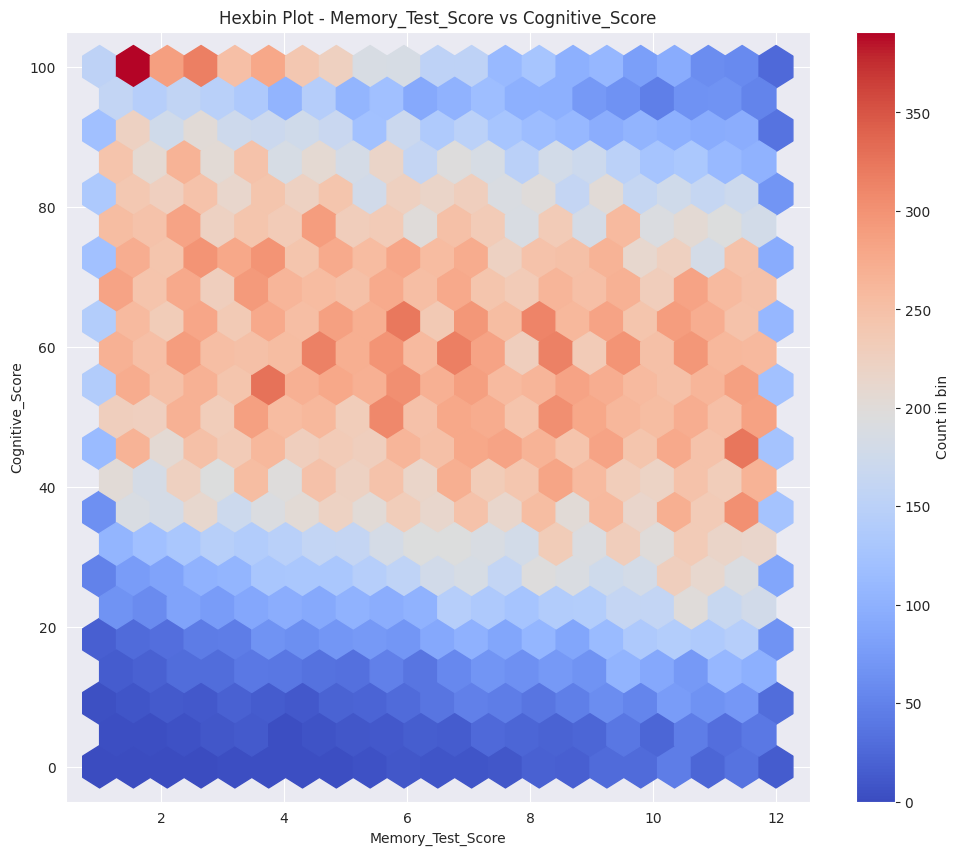

In [31]:
# Hexbin Plot - Memory_Test_Score vs Cognitive Score 
plt.figure(figsize=(12,10))
plt.hexbin(x=hcp_data['Daily_Screen_Time'], y=hcp_data['Cognitive_Score'],gridsize=20, cmap='coolwarm') # gridsize: Number of hexagons across the x-axis.
plt.colorbar(label='Count in bin')
plt.title("Hexbin Plot - Memory_Test_Score vs Cognitive_Score")
plt.xlabel("Memory_Test_Score")
plt.ylabel("Cognitive_Score")
plt.show()

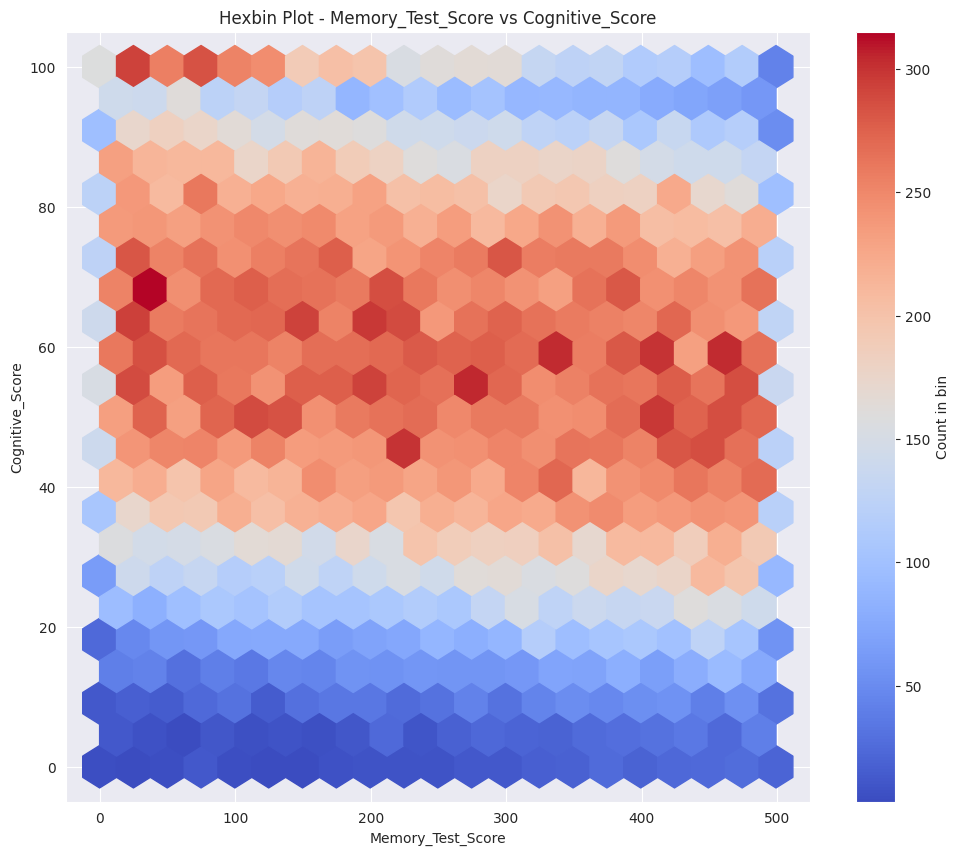

In [32]:
plt.figure(figsize=(12,10))
plt.hexbin(x=hcp_data['Caffeine_Intake'], y=hcp_data['Cognitive_Score'],gridsize=20, cmap='coolwarm') # gridsize: Number of hexagons across the x-axis.
plt.colorbar(label='Count in bin')
plt.title("Hexbin Plot - Memory_Test_Score vs Cognitive_Score")
plt.xlabel("Memory_Test_Score")
plt.ylabel("Cognitive_Score")
plt.show()


### 🔍 What is a **Bivariate KDE Plot**?

A **bivariate KDE plot** estimates the **joint probability density** of two continuous variables and displays it as:

- **Contour lines** (like a topographic map) — each line represents a level of density.
- Or as a **filled contour map** / heatmap.

This helps you **visualize the relationship between two variables** and how densely packed the data points are in various regions.

---

### 📈 Example using Seaborn:

```python
sns.kdeplot(data=df, x='Age', y='Stress_Level', fill=True, cmap='mako')
plt.title('Bivariate KDE Plot')
plt.show()
```

- `x` and `y` are two continuous numerical columns.
- `fill=True` gives a shaded density plot.
- `cmap` controls the color map.

---

### 🧭 How to interpret:

- **Tighter/closer contours** or **darker regions** ⇒ **higher density** of observations.
- **Wide spacing** ⇒ sparse data.
- Helps spot **clusters**, **correlations**, or **non-linear relationships**.

---

### ✅ When to Use Bivariate KDE (Contour) Plots:

- When you want to **see the shape of the joint distribution**.
- To detect **clusters**, **overlaps**, or **non-linear patterns**.
- Works best for **continuous variables** with a lot of data points.

---

### ⚠️ Limitations:

- Doesn't work well with **categorical** variables.
- Needs a good number of data points.
- Can be computationally heavy for very large datasets.

---

### 📌 TL;DR:

> A **bivariate KDE contour plot** is like a smooth 2D histogram that helps visualize where two variables **co-occur** most frequently.